In [1]:
# Projekt nr. 2
# Zadanie polega na doświadczalnym zmierzeniu wysokości, głębokości i ilości liści drzewa BST oraz drzewa AVL na podstawie losowo pomieszanej
# listy liczb naturalnych, dostarczeniu odpowiednich histogramów. 
# Dodatkwo: porównać dwa rodzaje drzew; sprawdzić, czy powyżej wymienione zmienne są ze sobą skorelowane; dostarczyć miarę rozrutu dla wysokości drzewa. 

In [1]:
# Algorytm pomieszania kolejności wyrazów listy Fishera - Yates'a.

import random

def Fisher_Yates(arr):
    n = len(arr)
    for i in range(n - 1, 0, -1): # od końca do początku
        j = random.randint(0, i)
        arr[i], arr[j] = arr[j], arr[i]
    return arr   

In [2]:
# Implementacja drzewa BST wraz z funkcjami wyszuaknia, dodawaia wezłów do drzewka, zmierzenia wysokośći, głębokości i ilości liści.
from collections import deque

class Node:
    def __init__(self, data = None, par = None):
        self.data = data
        self.left = self.right = None
        self.parent = par
        
class Tree:
    # inicjalizacja
    def __init__(self):
        self.dummy = Node('u')
        self.root = None
        
    # wyszukanie pozycji węzła
    def find(self, node, value):
        if node is None:
            return None, False
        
        if value == node.data:
            return node, True
        
        if value < node.data:
            if node.left:
                return self.find(node.left, value)
        
        if value > node.data:
            if node.right:
                return self.find(node.right, value)
        
        return node, False

    # dodawanie węzłów
    def append(self, obj):
        if self.root == None: 
            self.root = obj
            self.root.parent = self.dummy
            
        s, fl_find = self.find(self.root, obj.data) 
        
        if not fl_find and s:     
            if obj.data < s.data:
                s.left = obj
                obj.parent = s
                
            else:
                s.right = obj
                obj.parent = s
    # wysokość           
    def height(self,node):
        if node is None:
            return 0
        return max(self.height(node.left), self.height(node.right)) + 1
        
    # głębokość pewnego węzła
    def node_depth(self, root, target, depth=0):
         if root is None:
             return -1
         if root == target:
             return depth
         left = self.node_depth(root.left, target, depth + 1)
         if left != -1:
             return left
         return self.node_depth(root.right, target, depth + 1)
    # powyższa funkcja działa dobrze, ale bardzo wolno z powodu rekurencji
    
    # poniższa funkcja działa bez rekurencji i od razu oblicza średnią głębokość węzłów w drzewku. Funkcja działa jako kolejka priorytetowa FIFO.
    def average_node_depth_bfs(self, root):
        if not root:
            return 0

        queue = deque([(root, 0)])  # (węzeł, głębokość)
        depth_sum = 0
        node_count = 0

        while queue:
            node, depth = queue.popleft()
            depth_sum += depth
            node_count += 1

            if node.left:
                queue.append((node.left, depth + 1)) # jeśli węzeł ma lewe dziecko dodajemy go do kolejki
            if node.right:
                queue.append((node.right, depth + 1)) # jeśli węzeł ma prawe dziecko dodajemy go do kolejki

        return depth_sum / node_count
        
    # liczba liści
    def count_leaves(self, node):  
        if node is None:
            return 0
        if node.left is None and node.right is None:
            return 1
        return self.count_leaves(node.left) + self.count_leaves(node.right)

In [3]:
heights = []
leaves = []
depths = []

for _ in range(300):
    arr = [i for i in range(1, 10000)]
    arr_mixed = Fisher_Yates(arr)
    t = Tree()

    for i in arr_mixed:
        t.append(Node(i))

    heights.append(t.height(t.root))
    leaves.append(t.count_leaves(t.root))
    depths.append(t.average_node_depth_bfs(t.root))

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

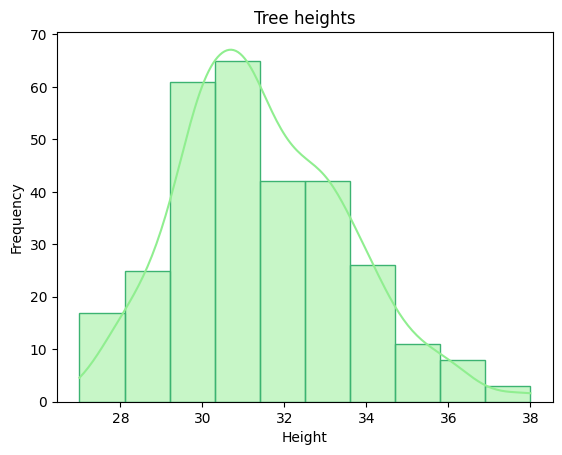

In [ ]:
sns.histplot(heights, bins=10, kde=True, color='lightgreen', edgecolor='mediumseagreen')
plt.title("Tree heights")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.show()

In [48]:
# Na powyższym histogramie widzimy rozkład wysokości 300 drzewek składających się z 10000 węzłów. Przypomina on rozkład normalny z lekką skośnością
# prawostronną. Teoretycznie, wysokość drzewka o takiej liczbie węzłów powinna wynosić [log(10000);10000], czyli [~13.3;10000]. Z histogramu widać, 
# że wysokość wylosowanych drzewek waha się w przedziale [26;38], co nie jest bardzo dobrym wynikiem, ale biorąc pod uwagę to, że węzły były 
# dodawane do drzewek w absolutnie losowej kolejności, rezultat nie jest aż tak zły. Większość drzew jest lekko niezbalansowana.

# Twierdzenie: jeżeli drzewo kształtuje się losowo, to z ogromnym prawdopodobieństwem jego wysokośc nie przekroczy trzech wysokośći minimalnych.
# Powyższy histogram dobrze udowadnia to twierdzenie, ponieważ maksymalna występująca wysokość to 38 co jest mniejsze niż 3 * 13,3 = 39,3.

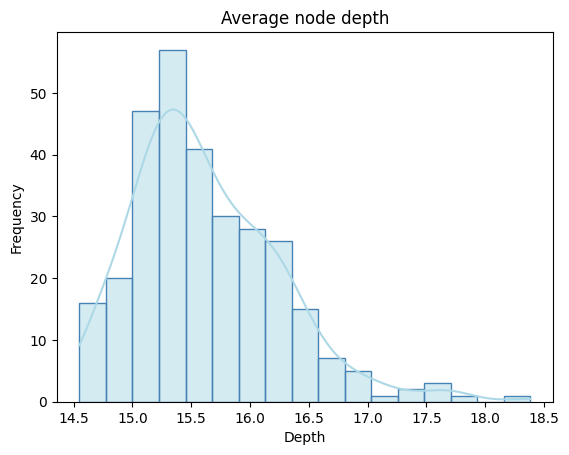

In [56]:
sns.histplot(depths, bins = 17, kde=True, color='lightblue', edgecolor='steelblue')
plt.title("Average node depth")
plt.xlabel("Depth")
plt.ylabel("Frequency")
plt.show()

In [50]:
# Powyższy histogram przedstawia rozkład średniej głębokości węzłów w losowych drzewach BST. Rozkład ten jest bardzo podobny do rozkładu wysokości 
# drzew, ale przesunięty w dół — wartości mieszczą się w przedziale [14.5;18.5], czyli są około 2 razy mniejsze niż wysokość drzew. Jest to naturalne,
# ponieważ przeciętny węzeł znajduje się mniej więcej w połowie ścieżki od korzenia do najdalszego liścia. Z teoretycznego punktu widzenia, oczekiwana
# średnia głębokość węzła w losowym BST wynosi około 2 * ln(n), co również potwierdza obserwowany rozkład dla n = 10 000 (około 18.4).

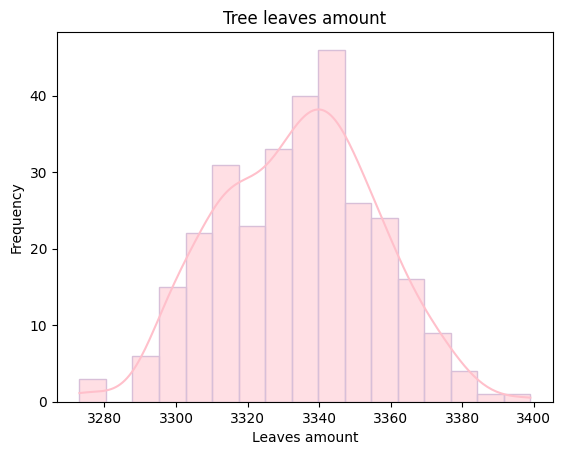

In [148]:
sns.histplot(leaves, bins=17, kde=True, color='pink', edgecolor='thistle')
plt.title("Tree leaves amount")
plt.xlabel("Leaves amount")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Histogram rozkładu liści w drezwach wygląda podobnie do rozkładu normalnego. Choć BST nie są zbalansowane, to przy losowym wstawianiu elementów 
# drzewo zachowuje się jak średnio zbalansowane. Niewielkie odchylenia od symetrii (np. skoki wartości) są normalne i wynikają z losowości wstawiania 
# elementów. Przewidywana średnia liczba liści w BST przy dużym n powinna zbliżać się do n / 3, co również potwierdzają wyniki widoczne na powyższym 
# histogramie — wartości oscylują w predziale [3280;3400].

In [ ]:
# Pytanie: czy te zmienne losowe są jakoś ze sobą skorelowane? 

In [ ]:
# 1. Wysokośc drzewa a średnia głębokość węzłów. 
# Intuicyjnie można oczekiwać, że wyższe drzewa BST będą miały większą przeciętną odległość węzłów od korzenia, co potwierdzają zarówno rozkłady 
# wysokości, jak i średnich głębokości — ich kształt jest podobny, choć średnia głębokość ma zauważalnie mniejszą wariancję. Wynika to z faktu, że
# wysokość zależy od pojedynczego najgłębszego węzła i jest przez to silnie wrażliwa na obserwacje odstające, podczas gdy średnia głębokość uwzględnia
# wszystkie węzły i lepiej odzwierciedla ogólną strukturę drzewa.

In [4]:
# Podtwierdzę intuicję za pomocą współczynnika korelacji Pearsona.
from scipy.stats import pearsonr
pearsonr(heights, depths)

PearsonRResult(statistic=np.float64(0.5701579447394418), pvalue=np.float64(2.911396154054774e-27))

In [ ]:
# Wartośc współczynnika korelacji wynosi 0,57, co wskazuje na umiarkowaną, dodatnią zależność liniową między tymi zmiennymi. Potwierdza to, że drzewa o
# większej wysokości mają zazwyczaj również większą średnią głębokość. Jednak nadal możliwe są przypadki drzew o podobnej średniej głębokości, ale 
# istotnie różnej wysokości, i odwrotnie. Obserwacja ta jest zgodna z teoretycznymi właściwościami drzew BST kształtujących się losowo.

In [ ]:
# 2. Liczba liści a wysokość drzewa.
# Intuicyjnie, im bardziej zrównoważone jest drzewo, tym więcej może być liści, bo więcej gałęzi kończy się na podobnym poziomie. Natomiast jeśli drzewo
# jest bardzo wydłużone, to ma ono jedną długa gałąź kończąca się pojedynczym liściem. 

In [8]:
pearsonr(heights, leaves)

PearsonRResult(statistic=np.float64(-0.1060566369329285), pvalue=np.float64(0.06658527636805411))

In [ ]:
# Współczynnik korelacji wyniosi -0.11, co świadczy o słabej ujemnej zależności pomiędzy wysokością drzewa a ilością liści. 
# Drzewa o większej wysokości mają zwykle bardziej wydłużoną i niesymetryczną strukturę, co prowadzi do mniejszej liczby liści. Z kolei drzewa niższe,
# które są bardziej zrównoważone, mają zazwyczaj więcej liści, ponieważ więcej ścieżek od korzenia kończy się na podobnym poziomie. Zależność ta nie
# jest jednak silna — zarówno wysokość, jak i liczba liści są zmiennymi losowymi zależnymi od konkretnej struktury drzewa. A ponieważ drzewa BST są 
# bardzo niestabilne, zależność tą jest trudno prześledzić.

In [ ]:
# 3. Średnia głębokość węzłów a liczba liści.
# Jak i w poprzednim przykładzie, drzewa posiadające więcej liści mają zwykle bardziej zrównoważoną strukturę i węzły położone bliżej korzenia,
# co skutkuje niższą średnią głębokością. Z kolei drzewa o mniejszej liczbie liści są często bardziej wydłużone i asymetryczne, co przekłada się na 
# większe przeciętne głębokości. 

In [9]:
pearsonr(depths, leaves)

PearsonRResult(statistic=np.float64(-0.09371572958661645), pvalue=np.float64(0.10523339325571791))

In [ ]:
# Jednak w rzeczywistości na wyniki w znacznym wymiarze wpływa losowość i różnorodność drzew BST, więc korelacja jest bardzo słaba i raczej nieistotna.

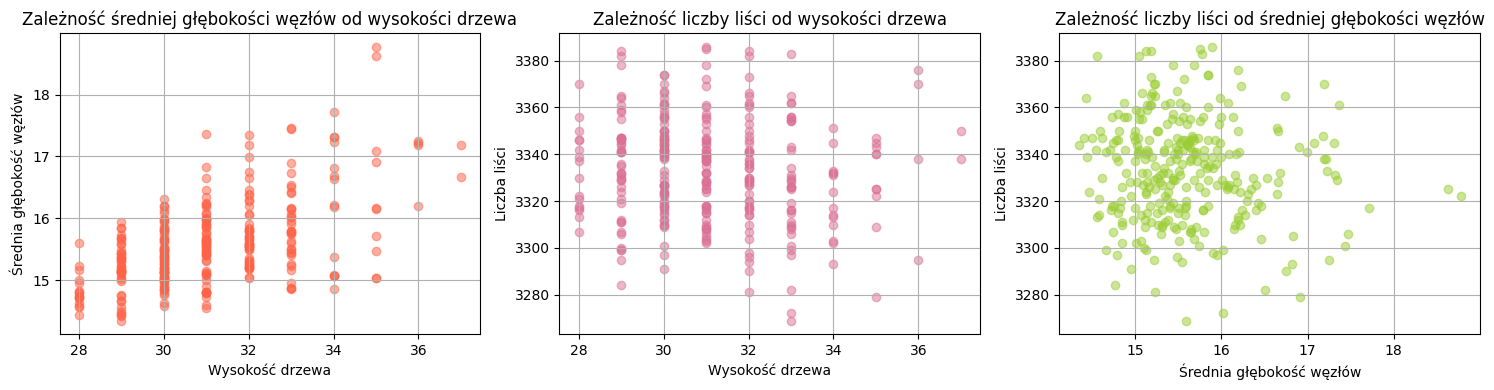

In [12]:
# W celu udowodnienia intuicji można utworzyć wykres zależnośći ilośći liści od wysokośći drzewa.
fig, axs = plt.subplots(1, 3, figsize=(15, 4)) 
plt.subplot(1, 3, 1)
plt.scatter(heights, depths, alpha=0.5, color="tomato")
plt.xlabel("Wysokość drzewa")
plt.ylabel("Średnia głębokość węzłów")
plt.title("Zależność średniej głębokości węzłów od wysokości drzewa")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(heights, leaves, alpha=0.5, color="palevioletred")
plt.xlabel("Wysokość drzewa")
plt.ylabel("Liczba liści")
plt.title("Zależność liczby liści od wysokości drzewa")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(depths, leaves, alpha=0.5, color="yellowgreen")
plt.xlabel("Średnia głębokość węzłów")
plt.ylabel("Liczba liści")
plt.title("Zależność liczby liści od średniej głębokości węzłów")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Powyższe wykresy udowadniają, że istnieje pewna średnio-silna zależność liniowa pomiędzy wysokością drzewa a średnią głębokością liści.
# Natomiast na 2 pozostałych wykresach widzimy chaotycznie rozproszone chmury z brakiem jakiejkolwiek zależności. Zatem, choć intuicyjnie wydaje się, 
# że istnieje pewna zależnośc pomiędzy wysokością drzewa albo średnią głębokością węzłów a liczbą liści, w rzeczywistości ta zależność jest bardzo słaba,
# niestabilna i jest bardzo wrażliwa na przypadkowy rozkład węzłów w losowym drzewie BST.

In [5]:
# Miara rozrzutu dla wysokośći drzewa. Jako miarę rozrzutu wybrałam odchylenie standardowe jako najbardziej klasyczną metodę.
import numpy as np
std_height = np.std(heights)
print(std_height)

2.350836730471373


In [ ]:
# Odchylenie standardowe wysokości drzew wynosi 2.35, co oznacza, że wysokości są dość jednorodne — większość drzew różni się od średniej zaledwie 
# o 2 poziomy. Jest to niska wartość w kontekście całkowitej wysokości, biorąc pod uwagę to, że drzewa kształtują się w sposób losowy.

In [6]:
# Chcę dodatkowo porównać odchylenie standardowe średniej głębokośći węzłów z odchyleniem standardowym wysokości drzew.
std_depth = np.std(depths)
print(std_depth)

0.681637956115273


In [ ]:
# Odchylenie standardowe dla średniej głębokości węzłów wynosi 0.68, a więc jest ponad trzykrotnie mniejsze niż dla wysokości drzew (2.35).
# Pokazuje to, że chociaż wysokość drzewa może się nieco różnić między przypadkami, to większość węzłów znajduje się na bardzo podobnej głębokości.
# Średnia głębokość jest więc znacznie mniej wrażliwa na skrajne przypadki (np. pojedyncze długie gałęzie), podczas gdy wysokość drzewa bardzo na 
# nie reaguje.

In [14]:
# AVL 

class NodeAVL:
    def __init__(self, data = None, par = None):
        self.data = data
        self.left = self.right = None
        self.parent = par
        self.height = 1

class AVLTree:
    def __init__(self):
        self.root = None

    # wysokość węzła
    def get_height(self, node):
        return 0 if not node else node.height

    # wskaźnik balansu drzewa (w drzewach AVL powinien wynosić {-1, 0, 1})
    def get_balance_factor(self, node):
        return 0 if not node else (self.get_height(node.left) - self.get_height(node.right))

    # wyszukanie węzła
    def search(self, value):
        x = self.root
        while x is not None and x.data != value:
            if value < x.data:
                x = x.left
            else:
                x = x.right
        return x

    # rotacja lewostronna
    def left_rotate(self, node):
        B = node.right
        Y = B.left

        B.left = node
        node.right = Y

        node.height = 1 + max(self.get_height(node.left),self.get_height(node.right))
        B.height = 1 + max(self.get_height(B.left),self.get_height(B.right))

        return B
        
    # rotacja prawostronna
    def right_rotate(self, node):
        A = node.left
        Y = A.right
        
        A.right = node
        node.left = Y
        
        node.height = 1 + max(self.get_height(node.left), self.get_height(node.right))
        A.height = 1 + max(self.get_height(A.left), self.get_height(A.right))
        
        return A

    # wstawianie węzła do drzewa
    def insert(self, root, value): # value - to co dodajemy
        if not root:
            return NodeAVL(value)
        elif value < root.data:
            root.left = self.insert(root.left, value)
        else:
            root.right = self.insert(root.right, value)

        root.height = 1 + max(self.get_height(root.left), self.get_height(root.right))

        # Aktualizacja balance factor oraz balansowanie drzewa za pomocą rotacji
        bf = self.get_balance_factor(root)

        if bf > 1 and value < root.left.data:
            return self.right_rotate(root)
        
        if bf < -1 and value > root.right.data:
            return self.left_rotate(root)
        
        if bf > 1 and value > root.left.data:
            root.left = self.left_rotate(root.left)
            return self.right_rotate(root)
        
        if bf < -1 and value < root.right.data:
            root.right = self.right_rotate(root.right)
            return self.left_rotate(root)
        
        return root

    # wysokość           
    def height(self,node):
        if node is None:
            return 0
        return max(self.height(node.left), self.height(node.right)) + 1
    
    # poniższa funkcja działa bez rekurencji i od razu oblicza średnią głębokość węzłów w drzewku. Funkcja działa jako kolejka priorytetowa FIFO.
    def average_node_depth_bfs(self, root):
        if not root:
            return 0

        queue = deque([(root, 0)])  # (węzeł, głębokość)
        depth_sum = 0
        node_count = 0

        while queue:
            node, depth = queue.popleft()
            depth_sum += depth
            node_count += 1

            if node.left:
                queue.append((node.left, depth + 1)) # jeśli węzeł ma lewe dziecko dodajemy go do kolejki
            if node.right:
                queue.append((node.right, depth + 1)) # jeśli węzeł ma prawe dziecko dodajemy go do kolejki

        return depth_sum / node_count

    # liczba liści
    def count_leaves(self, node):  
        if node is None:
            return 0
        if node.left is None and node.right is None:
            return 1
        return self.count_leaves(node.left) + self.count_leaves(node.right)

In [19]:
heightsAVL = []
leavesAVL = []
depthsAVL = []

for _ in range(300):
    arr = list(range(1, 10000))
    arr_mixed = Fisher_Yates(arr)
    t = AVLTree()

    for i in arr_mixed:
        t.root = t.insert(t.root, i)

    heightsAVL.append(t.height(t.root))
    leavesAVL.append(t.count_leaves(t.root))
    depthsAVL.append(t.average_node_depth_bfs(t.root))


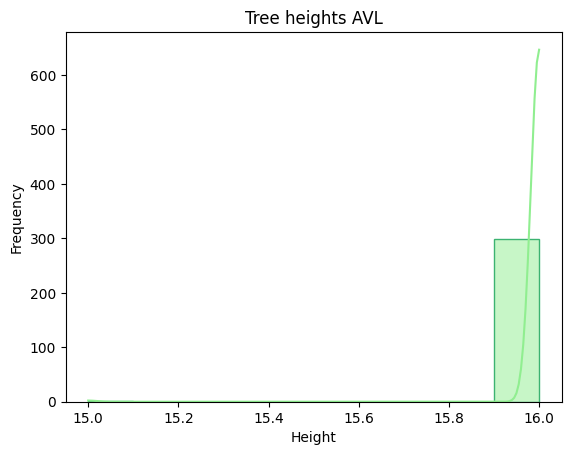

In [194]:
sns.histplot(heightsAVL, bins=10, kde=True, color='lightgreen', edgecolor='mediumseagreen')
plt.title("Tree heights AVL")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Histogram wysokośći dla drzew AVL pokazuje, że dla 10000 węzłów drzewo zazwyczaj osiąga wysokość 16. Jest to zgodne z teoretycznymi przewidywaniami —
# wysokość drzewa AVL rośnie logarytmicznie względem liczby węzłów. Dla 10000 węzłow teoretyczna wysokość drzewa AVL powinna wynosić ok. 
# 1.44 * log₂(10000) ≈ 1.44 * 13.3 ≈ 19.1 w najgorzym przypadku, a w najlepszym log₂(10000) ≈ 13.3. To oznacza, że algorytm balansowania drzewa AVL
# jest jak najbardziej efektywny.

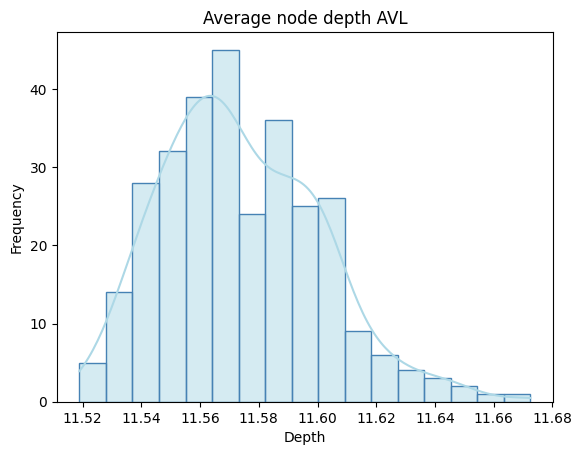

In [191]:
sns.histplot(depthsAVL, bins = 17, kde=True, color='lightblue', edgecolor='steelblue')
plt.title("Average node depth AVL")
plt.xlabel("Depth")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Powyższy histogram przedstawia rozkład zmienności średnich głębokości węzłów dla drzewa AVL. Histogram ma kształt lekko asymetryczny prawoskośny. 
# W AVL drzewa są samobalansujące, więc średnia głębokość węzłów jest dość mała i stabilna i wynosi maksymalnie log10000 = 13.3.
# W porownaniu z histogramem dla drzewa BST ten rozkład posiada małą rozpiętość (od ~11.52 do ~11.68) co oznacza, że drzewo utrzymuje swoją strukturę 
# zrównoważoną, niezależnie od kolejności wprowadzania danych wejściowych. Takie zachowanie jest zgodne z oczekiwaniami dla AVL. Dodatkowo można 
# zauważyć, że średnia glębokość przeciętnego węzła w drzewie AVL jest większa w stosunku do wysokości niż w drzewie BST 
# ( 11.68 / 16 ≈ 0.73 dla AVL w porównaniu z  18.5 / 38 ≈ 0.48 dla BST). To oznacza, że wszystkie gałęzie rozrastają się równomiernie w drzewie AVL.

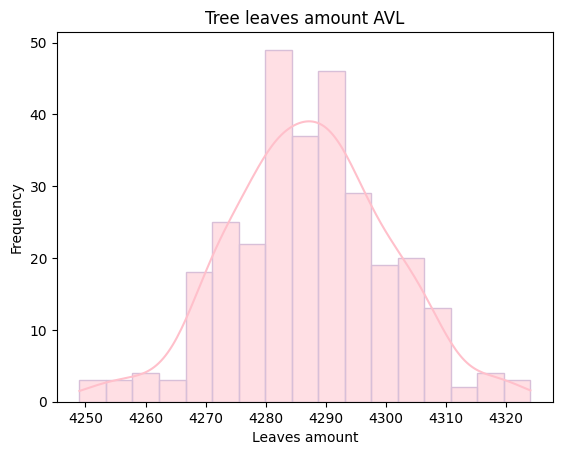

In [192]:
sns.histplot(leavesAVL, bins=17, kde=True, color='pink', edgecolor='thistle')
plt.title("Tree leaves amount AVL")
plt.xlabel("Leaves amount")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Powyższy histogram przedstawia rozkład liczby liści w drzewie AVL. Histogram ma kształt zbliżony do rozkładu normalnego. Wszystkie wartości mieszczą 
# się w dosyć wąskim przedziale [4250;4320]. Ponadto, większość wyników waha się w jescze mniejszym przedziale [4270;4310]. To świadczy o tym, że drzewo
# AVL tworzy spójną strukturę i utrzymuje stabilną liczbę liści, co jest zgodne z oczekiwaaniami. Różnice wynikają jedynie z losowości kolejności 
# wstawiania węzłów. Dodatkowo porównując te wyniki z wynikami dla drzew BST można zauważyć, że w drzewach AVL liczba liści jest o ponad 1000 większa.
# To świadczy o tym, że drzewa AVL są bardziej równomiernie rozłożone w porównaniu z drzewami bez balansowania. To jest zgodne z oczekiwaniami.

In [ ]:
# Badanie zależności pomiędzy zmiennymi w drzewach AVL.

In [ ]:
# 1. Wysokość drzewa a średnia głębokość węzłów.
# Średnia głębokość węzłów rośnie bardzo podobnie jak wysokość drzewa, ponieważ drzewo AVL zachowuje zrównoważoną strukturę niezależnie od kolejności 
# wstawiania danych. Co więcej zmienność między różnymi instancjami drzewa o tej samej liczbie węzłów jest bardzo niska. Dlatego zależność między tymi
# dwiema miarami powinna być dosyć silna zgodnie z zasadą działania algorytmu balansowania drzew.

In [23]:
# Współczynnik korelacji Pearsona
pearsonr(heightsAVL, depthsAVL)

PearsonRResult(statistic=np.float64(0.24446207633254646), pvalue=np.float64(1.8549485997403957e-05))

In [ ]:
# W rzeczywistości zależność pomiędzy wysokością drzewa a średnią głębokością węzłów okazała się słaba, z korelacją r ≈ 0.24. Choć teoretycznie obie
# miary rosną w podobny sposób (logarytmicznie względem liczby węzłów), w praktyce przy ustalonej liczbie węzłów wysokość drzewa AVL jest niemal stała
# (jak pokazuje histogram). Niewielka zmienność tej cechy sprawia, że korelacja liniowa z średnią głębokością jest niska.

In [ ]:
# 2. Wysokość drzewa a liczba liści.
# Teoretycznie, im wyższe drzewo, tym więcej poziomów, czyli potencjalnie więcej liści. Ale  jak wynika z wcześniejszego doświadczenia, z powodu
# zbalansowaności drzew AVL, przy stałej liczbie węzłów wysokość drzewa też jest stała. Dlatego liczba liści po prostu nie ma za bardzo z czym korelować.
# Zatem najprawdopodobniej otrzymamy prawie zerową zależność.

In [24]:
pearsonr(heightsAVL, leavesAVL)

PearsonRResult(statistic=np.float64(0.01209448201637545), pvalue=np.float64(0.8347482674581853))

In [ ]:
# Zgodnie z przewidywaniami, w drzewach AVL nie zaobserwowano wyraźnej zależności między wysokością drzewa a liczbą liści. Choć teoretycznie większa 
# wysokość może pozwalać na więcej liści, w AVL ta zmienność jest bardzo mała.

In [ ]:
# Średnia głębokość węzłów a liczba liści.
# Zgodnie z wcześniejszym doświadczeniem, obie cechy są stabilizowane przez mechanizm balansowania drzewa, co powinno skutkować niską zmiennością 
# i brakiem wyraźnej współzależności.

In [25]:
pearsonr(depthsAVL, leavesAVL)

PearsonRResult(statistic=np.float64(0.06869421225493023), pvalue=np.float64(0.2355222750872127))

In [ ]:
# Rzeczywiście, otrzymano wynik r ≈ 0.06, co skutkuje brakiem jakiejkolwiek zależności. AVL jest „sztywne” – ogranicza zarówno głębokości, jak i liczbę
# liści w bardzo wąskim zakresie. Zatem można uznać, że przy stałej liczbie węzłów w drzewach AVL nie istnieje wyraźna zależność między średnią
# głębokością a liczbą liści.

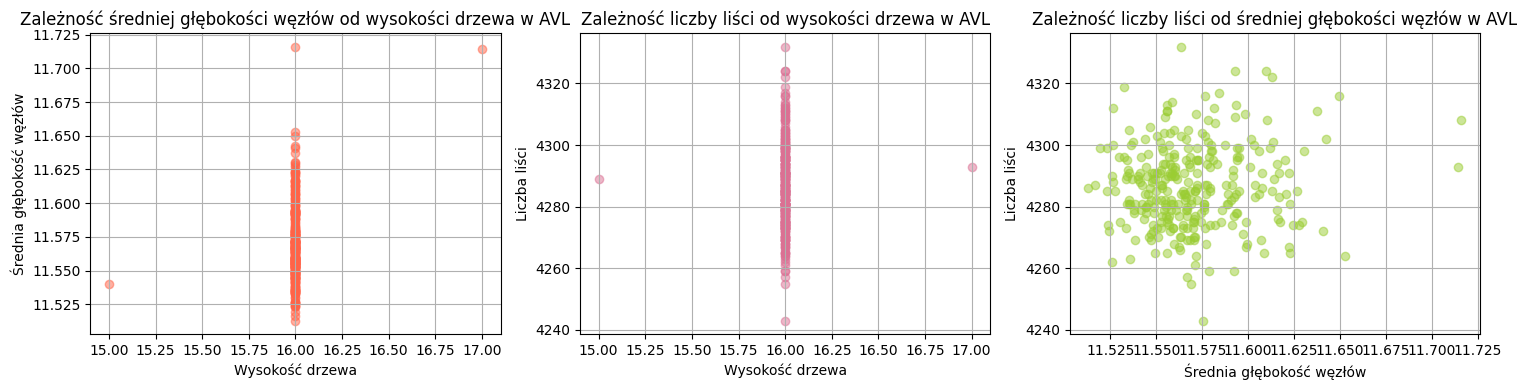

In [26]:
# Wykresy punktowe
fig, axs = plt.subplots(1, 3, figsize=(15, 4)) 
plt.subplot(1, 3, 1)
plt.scatter(heightsAVL, depthsAVL, alpha=0.5, color="tomato")
plt.xlabel("Wysokość drzewa")
plt.ylabel("Średnia głębokość węzłów")
plt.title("Zależność średniej głębokości węzłów od wysokości drzewa w AVL")
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(heightsAVL, leavesAVL, alpha=0.5, color="palevioletred")
plt.xlabel("Wysokość drzewa")
plt.ylabel("Liczba liści")
plt.title("Zależność liczby liści od wysokości drzewa w AVL")
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(depthsAVL, leavesAVL, alpha=0.5, color="yellowgreen")
plt.xlabel("Średnia głębokość węzłów")
plt.ylabel("Liczba liści")
plt.title("Zależność liczby liści od średniej głębokości węzłów w AVL")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Na podstawie powyższych wykresów można zauważyć, że niemal zerowa zmienność wysokości drzew sprawia, że wykresy 1 i 2 są bardzo „ściśnięte” w
# poziomie – punkty koncentrują się wokół jednej wartości na osi X. Z kolei wykres 3 przypomina rozproszoną chmurę punktów – w tym przypadku zarówno
# średnia głębokość, jak i liczba liści wykazują niewielką zmienność w bardzo wąskim przedziale.

In [10]:
# Odchylenie standardowe wysokości drzew AVL.
std_height_AVL = np.std(heightsAVL)
print(std_height_AVL)

0.09949874371066199


In [ ]:
# Bardzo małe odchylenie standardowe podtwierdza doświadczenie z histogramu: algorytm drzew AVL bardzo dobrze balansuje ich strukturę i jako wynik
# otrzymujemy prawie taką samą wysokość dla wszystkich 300 drzew.

In [197]:
# Dodatkowo porównuję z odchyleniem standardowym średniej głębokości węzłów w drzewie AVL
std_depth_AVL = np.std(depthsAVL)
print(std_depth_AVL)

0.027859768941473916


In [ ]:
# Tak małe odchylenie standardowe świadczy o tym, że przeciętny węzeł drzewa AVL znajduje się prawie na tym samym poziomie we wszystkich obserwacjach.
# Jest ono nawet mniejsze niż w przypadku drzewa BST, co świadczy o bardziej stabilnej i przewidywalnej strukturze drzewa AVL.

In [ ]:
# Wnioski końcowe

# W projekcie porównano drzewa BST i AVL pod względem wysokości, liczby liści i średniej głębokości węzłów.
# BST, choć prostsze, przy losowych danych często tworzy drzewa o dużej wysokości i nieregularnej strukturze. Z kolei AVL, dzięki automatycznemu 
# balansowaniu, utrzymuje wysokość blisko optimum (~1.44·log₂(n)), co skutkuje większą stabilnością i przewidywalnością. Histogramy potwierdziły, 
# że AVL generuje węższy rozrzut wyników i bardziej zrównoważone drzewa.
# Zależności między parametrami okazały się trudne do uchwycenia liczbowo — mimo że intuicyjnie istnieją, są nieliniowe i zależne od konkretnego
# kształtu drzewa.

# Wniosek: AVL zapewnia znacznie lepsze właściwości strukturalne niż losowy BST, co robi je lepszym wyborem w praktyce, gdy zależy nam na wydajności 
# i przewidywalnych czasach operacji.